In [68]:
#Variable                  Description                                                          Relation to Hypothesis

In [69]:
# Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,gradient_boosting
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.cluster import DBSCAN,k_means
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso,LassoCV,LinearRegression,Ridge,RidgeCV
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,KFold,ParameterGrid,train_test_split
#from sklearn.neighbors import kd_tree,KDTree,KNeighborsClassifier
from sklearn.metrics import accuracy_score,auc,classification_report,confusion_matrix,euclidean_distances,euclidean_distances,f1_score
from sklearn.metrics import plot_roc_curve
from  sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVR
from sklearn.preprocessing import OneHotEncoder,power_transform,StandardScaler
from statsmodels.stats import anova,outliers_influence
import warnings
warnings.filterwarnings('ignore')

In [70]:
# loading the dataset
df=pd.read_csv(r'D:\Datatrained\Practice Project Data Trained\Basketball\baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [71]:
#Trying to see the value of Happiness Score for the least Ranking Countries

df.head(30)


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [73]:
#30 columns, 0 to 29
#total 17 columns
# No missing value
#dtypes: float64(1), int64(16)


In [74]:
# Analyzing the each colum whether they are categorialor continueous
pd.set_option('display.max_columns',25)

In [75]:
df.apply(lambda x: sum(x.isnull()))

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [76]:
# Lets look on number of unique value for each of categorical variable
df.apply(lambda x: len(x.unique()))

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [77]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='int64']
categorical_columns = [x for x in categorical_columns if x in ['W','2B','3B','CG','SHO','SV','E']]
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible W
68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

Frequency of Categories for varible 2B
272    3
260    2
289    2
278    2
277    2
274    2
288    2
300    1
292    1
251    1
236    1
265    1
295    1
257    1
243    1
262    1
279    1
294    1
246    1
308    1
303    1
263    1
Name: 2B, dtype: int64

Frequency of Categories for varible 3B
27    3
39    2
49    2
17    2
32    2
26    2
42    1
48    1
37    1
18    1
40    1
13    1
34    1
30    1
21    1
46    1
22    1
44    1
33    1
20    1
19    1
29    1
36    1
Name: 3B, dtype: int64

Frequency of Categories for varible CG
1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64

Frequency of Categories for varible SHO
12    7
10    5
13    3
8     2
9     2

In [78]:
# In most of the categorical variable,npo of category is greter thean 8

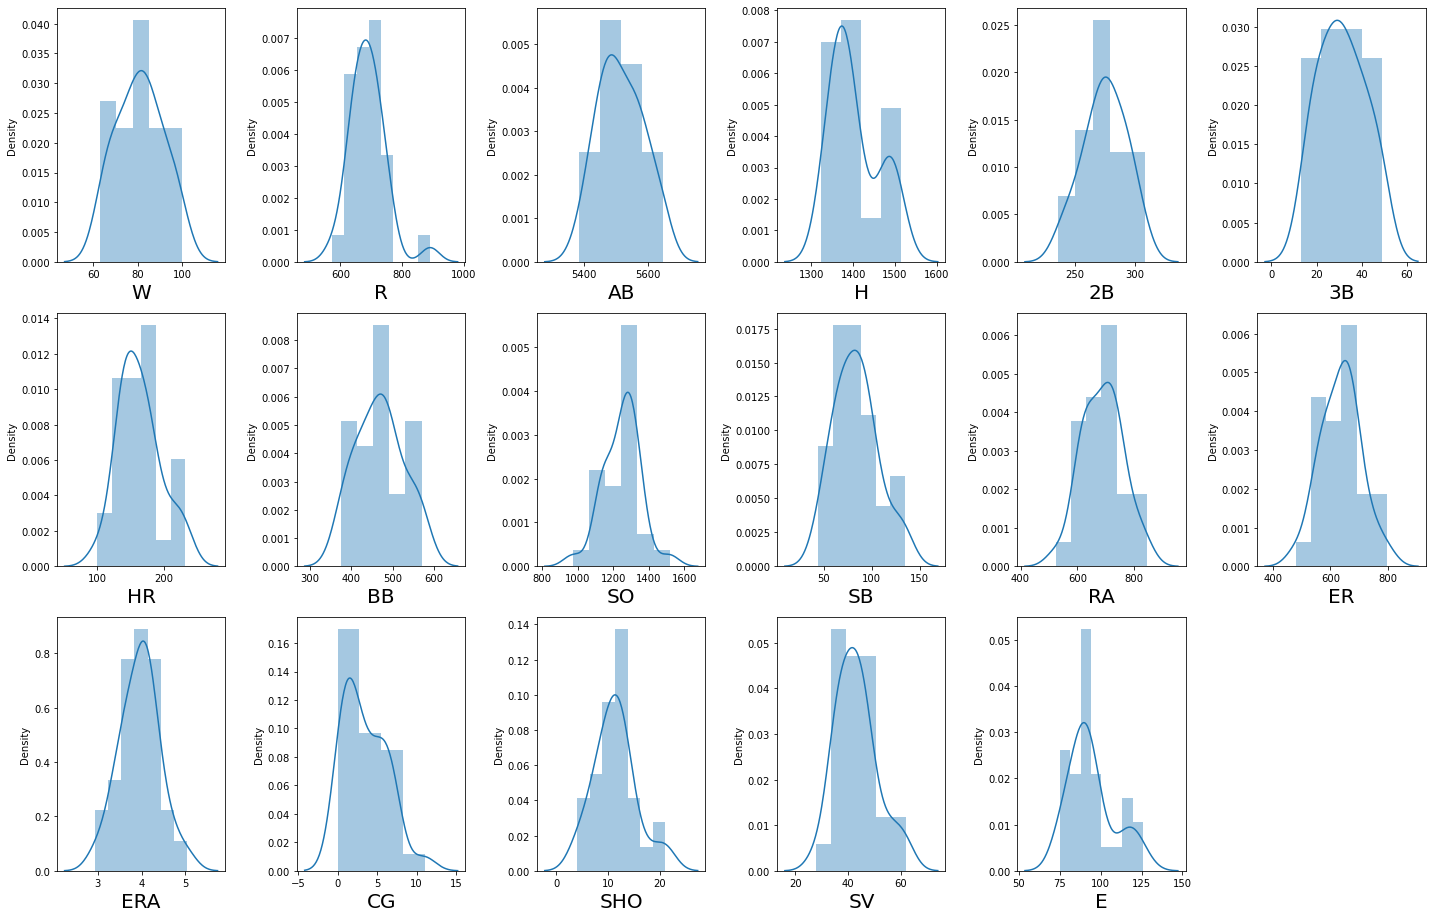

In [79]:
#EDA

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=32:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout() 

In [45]:
# After analysing the graph,It has been observed that there is skewness in continueous features 

#Right Skew

#R,SO,SB,RA,CG

# Left Skew

#SO

#W,2B,3B,CG,SHO,SV,E  

In [46]:
#Data columns (total 17 columns):
#dtypes: float64(1), int64(16)


In [47]:
#Statistical Summary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [48]:
#Observation

# No missing values
#Min is zero for CG
#Standard deviation is high for CG,high diffrence between min and max
#Standard deviation is high for SHO


In [49]:
# Checking null value in Dataset even in Categorical variable

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

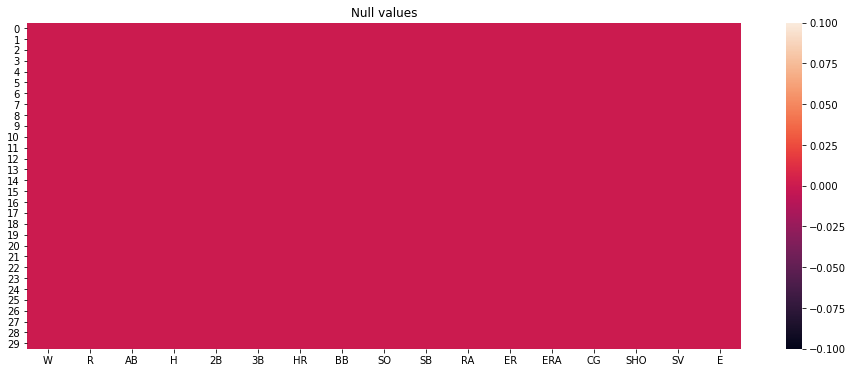

In [50]:
# Cheking Null values with the help of heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

In [51]:
# Multivariate Analysis
# checking correlation

corr_mat=df.corr() 
corr_mat


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


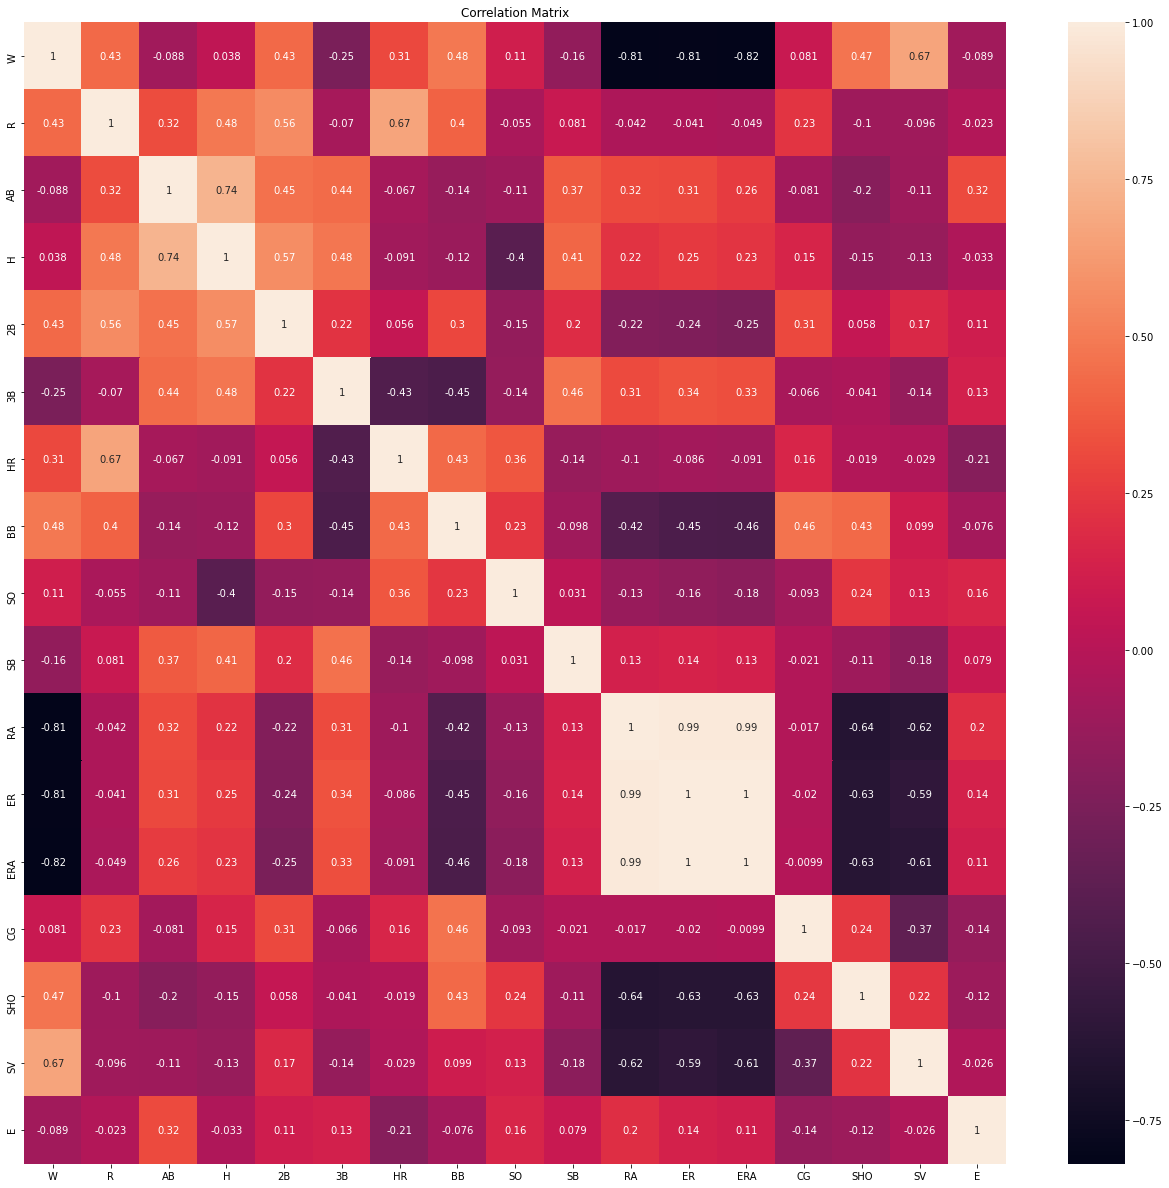

In [52]:
# It is difficut to analyse each feature co-relation in tabular form,lets convert into heat map plot
plt.figure(figsize= [22,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [53]:
# It has been observed that there is stong co relation between EPA vs RA and ER vs RA

In [54]:
# Lets see co relation score in tabular form
corr_mat=df.corr()
corr_mat['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [56]:
#splitting the independent and target variable in x and y
y=df['W']
x=df.drop(columns=['W'])

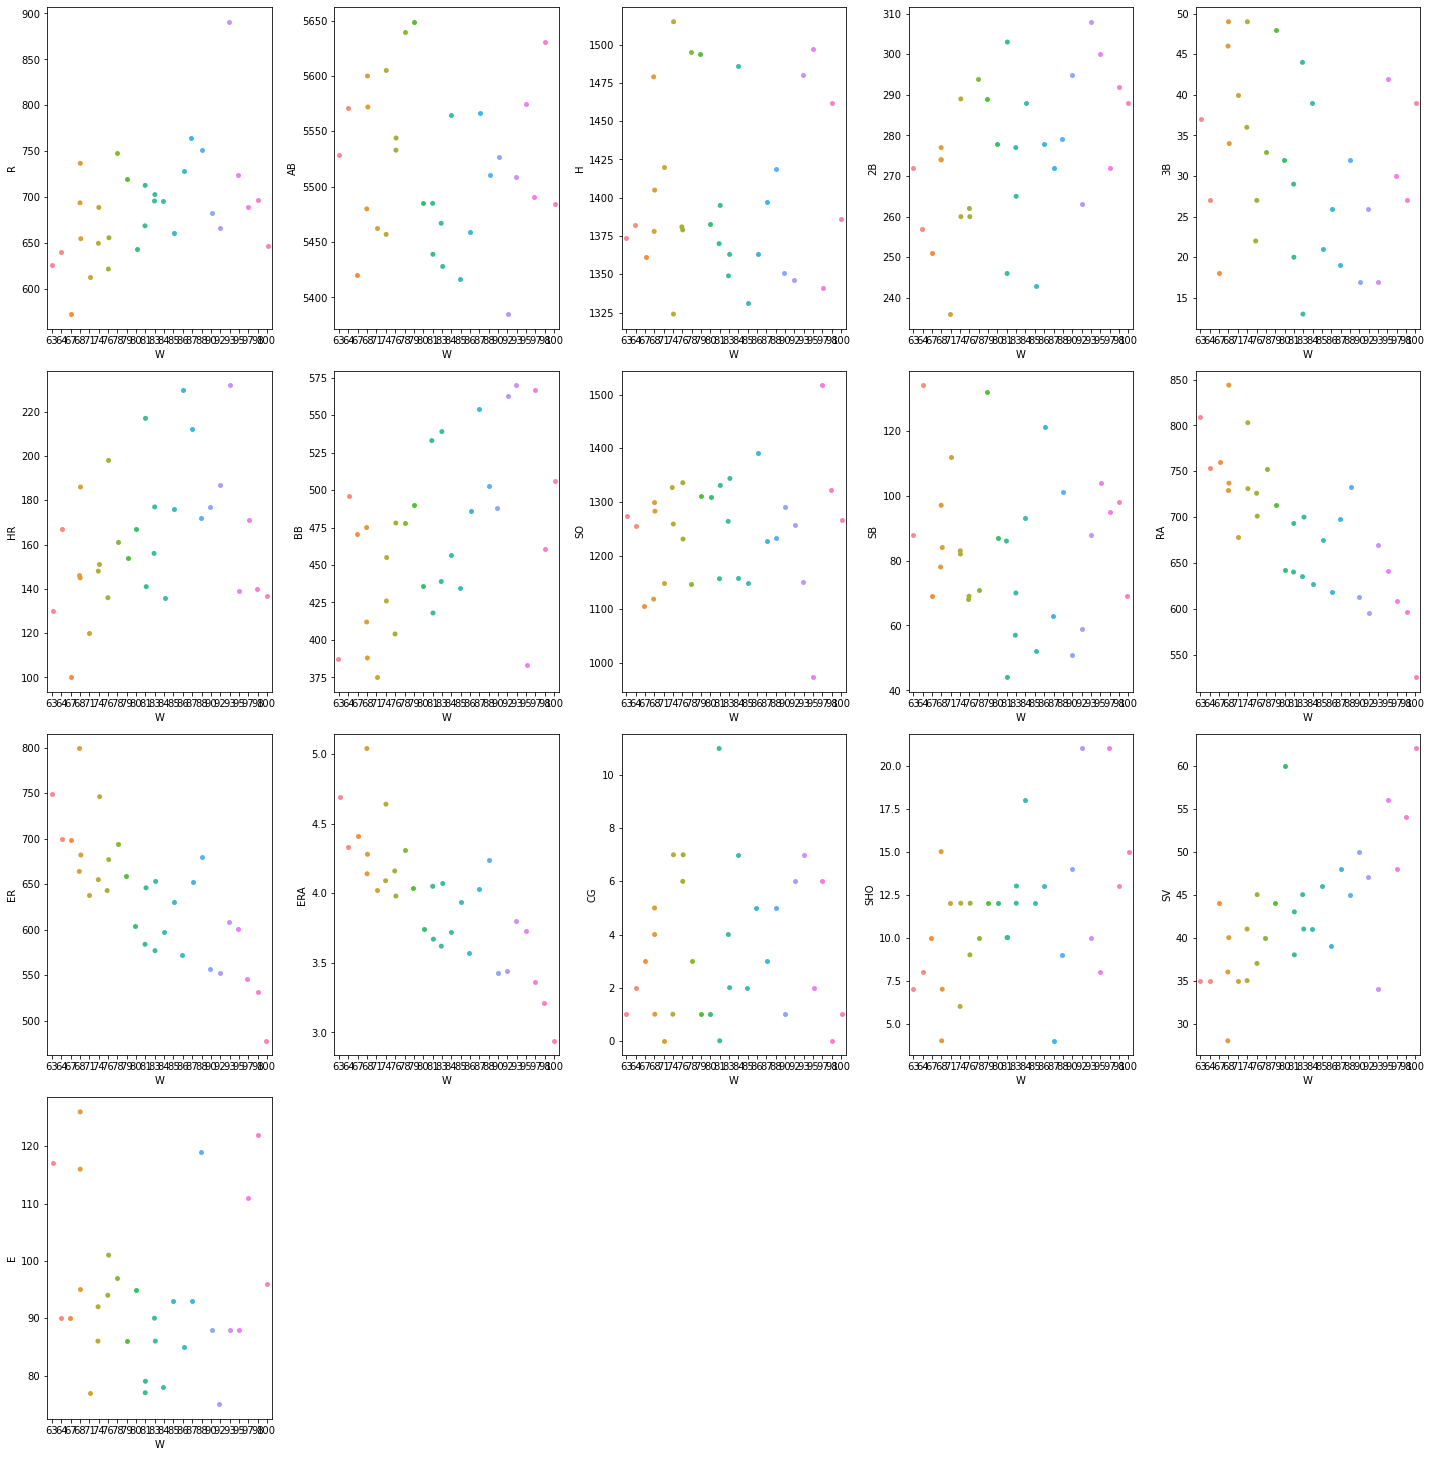

In [57]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

In [58]:
# In graph,each feature are corelated to output variable

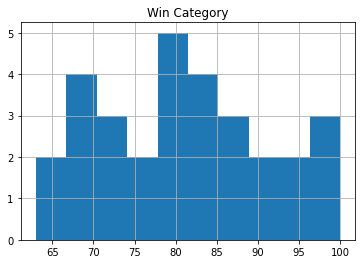

In [59]:
# Outcome feature Analysis
df['W'].hist(grid=True)# Univariate Analysis
plt.title("Win Category")
plt.show()

In [60]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [61]:
#splitting the independent and target variable in x and y
y=df['W']
x=df.drop(columns=['W'])

In [62]:
#checking skewness
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [31]:
#There are two continueous features who is  greater than 0.5 

#R,H


In [32]:
#we can see skewness in the dataset. we can remove the skewness using power transforn function

In [33]:
#Creating two dataset for transformation
x1=df[['R','H']]
x1.head()
x2=df.drop(columns=['R','H'],axis=1)
x2.head()

,W,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [34]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x1)
df_new=pd.DataFrame(df_new,columns=x1.columns)

In [35]:
# values have become zero after power transformation,Lets try another method

df_new.skew()

R    0.0
H    0.0
dtype: float64

In [36]:
#Now skewness is zero after power transformation

In [37]:
result = pd.concat([df_new, x2], axis=1)
result.shape

(30, 17)

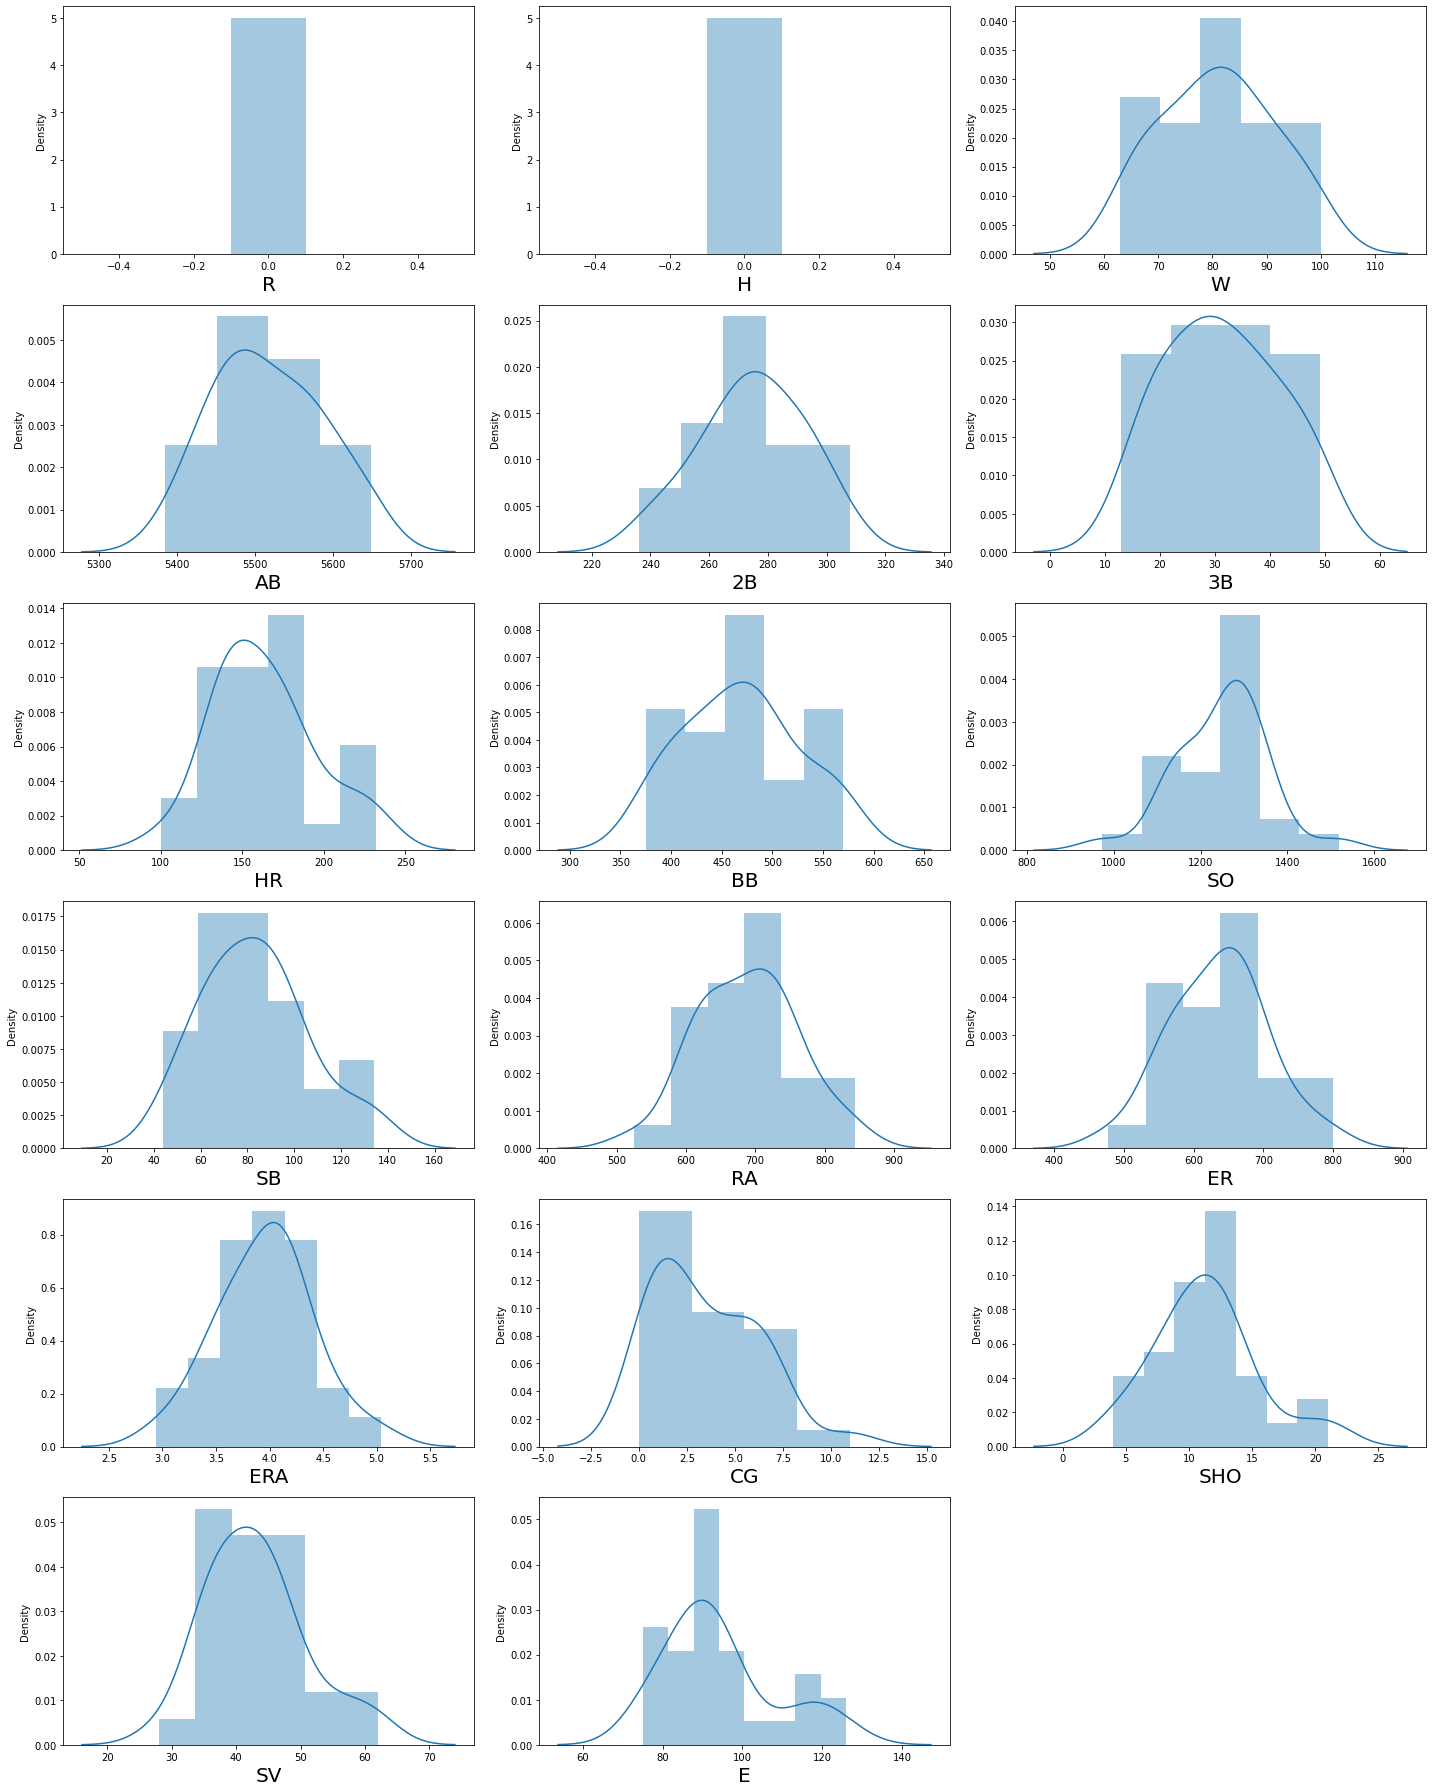

In [38]:
# Lets check distribution after transformation,
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in result:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(result[column])
        plt.xlabel(column,fontsize=20)
       
    
    plotnumber+=1
plt.tight_layout()  

In [ ]:
# Boxplot outlier tretment

In [39]:
#Lets check the skewness with  boxplot 

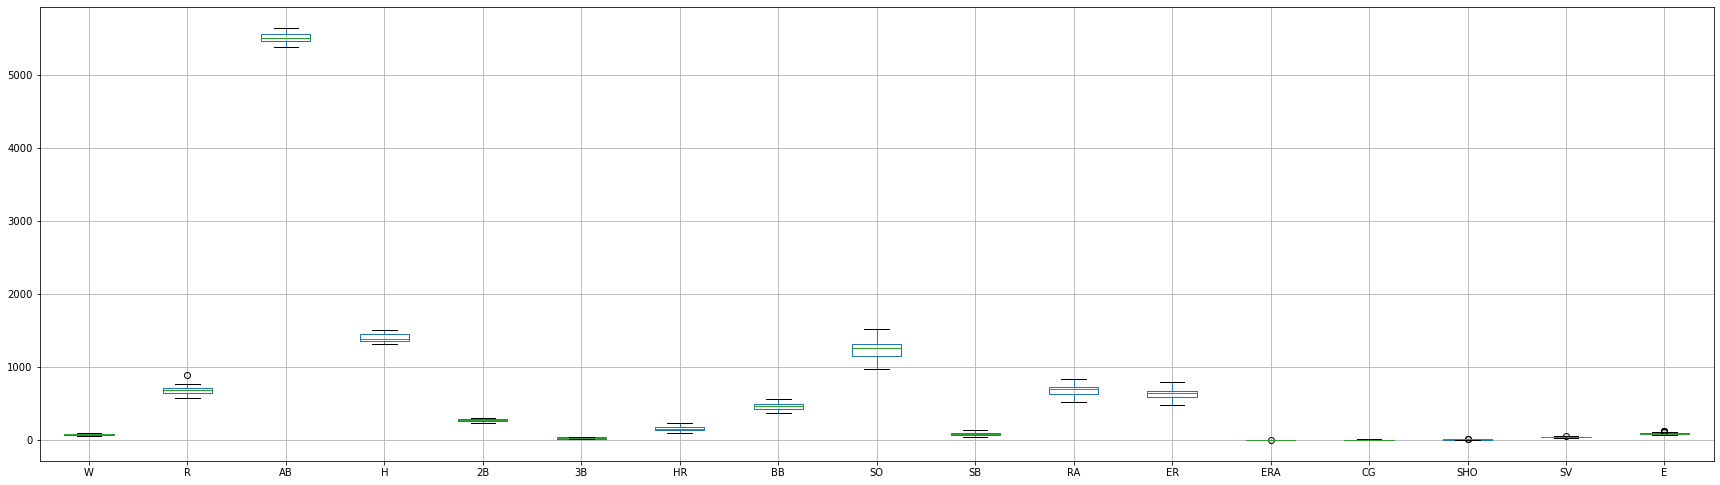

In [64]:
df.boxplot(figsize=[30,10],)
plt.subplots_adjust(bottom=.25)
plt.show()

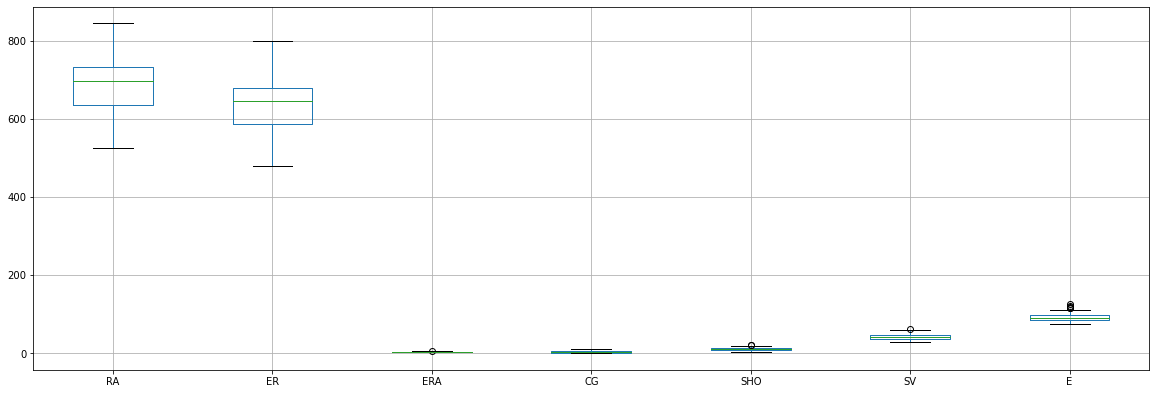

In [65]:
df.iloc[:,10:20].boxplot(figsize=[20,8],)
plt.subplots_adjust(bottom=.25)
plt.show()

In [42]:
# In box plot,ERA,R are on higher side


In [80]:
# 1st quantile

q1=df.quantile(0.25)

#3rd quantile

q3=df.quantile(0.75)

# IQR

iqr=q3-q1

In [81]:
index=np.where(result['ERA']>(q3.ERA+(1.5*iqr.ERA)))
result=result.drop(result.index[index])
result.reset_index()

,index,R,H,W,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,0.0,0.0,95,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,0.0,0.0,83,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,0.0,0.0,81,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,0.0,0.0,76,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,0.0,0.0,74,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,5,0.0,0.0,93,5509,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,6,0.0,0.0,87,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,7,0.0,0.0,81,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,8,0.0,0.0,80,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,9,0.0,0.0,78,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [82]:
index=np.where(result['R']>(q3.R+(1.5*iqr.R)))
result=result.drop(result.index[index])
result.reset_index()

,index,R,H,W,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,0.0,0.0,95,5575,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,0.0,0.0,83,5467,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,0.0,0.0,81,5439,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,0.0,0.0,76,5533,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,0.0,0.0,74,5605,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,5,0.0,0.0,93,5509,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,6,0.0,0.0,87,5567,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,7,0.0,0.0,81,5485,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,8,0.0,0.0,80,5485,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,9,0.0,0.0,78,5640,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [83]:
result.columns

Index(['R', 'H', 'W', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [ ]:
#Categorical
W,2B,3B,CG,SHO,SV,E

['W','2B','3B','CG','SHO','SV', 'E']

#Continueous

['R','H','AB','HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA' ]

In [132]:
# converting W values H stands high probability of winning and  L stands LOW probability of winning

result['W']=result['W'].replace({'68':'L','76':'L','74':'L','63':'L','67':'L','71':'L','64':'L','78':'L','80':'L',
                                 '81':'H','83':'H','98':'H','84':'H','92':'H','90':'H','97':'H','95':'H','100':'H',
                                 '85':'H','86':'H','88':'H','87':'H','93':'H','79':'L'})

In [133]:
result['W'].value_counts()

H    16
L    13
Name: W, dtype: int64

In [136]:
#Splitting the dataset
x=result.drop(columns=['W'])
y_over=result['W']

In [137]:
#Scaling the data

In [139]:
# Import libraries and download example data
from sklearn.preprocessing import StandardScaler, OneHotEncoder



# Define which columns should be encoded vs scaled
columns_to_encode = ['2B','3B','CG','SHO','SV', 'E']
columns_to_scale  = ['R','H','AB','HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA' ]
# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(x[columns_to_scale]) 
encoded_columns = ohe.fit_transform(x[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
x_over = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [140]:
x_over

array([[ 0.        ,  0.        ,  0.87052267, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.67949268, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -1.08134851, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.72700273, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.93257022, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.82301262, ...,  0.        ,
         0.        ,  0.        ]])

In [141]:
# Model Development

In [ ]:
# Finding best random state

In [142]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test =train_test_split(x_over,y_over,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 1.0 on Random_state 4


In [ ]:
#Best accuracy is 1.0 on Random_state 4

In [ ]:
#Creating Train test split

In [209]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8888888888888888
[[5 1]
 [0 3]]
              precision    recall  f1-score   support

           H       1.00      0.83      0.91         6
           L       0.75      1.00      0.86         3

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9



In [145]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(accuracy_score(y_test,predxgb))
print(confusion_matrix(y_test,predxgb))
print(classification_report(y_test,predxgb))

[18:07:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7777777777777778
[[5 1]
 [1 2]]
              precision    recall  f1-score   support

           H       0.83      0.83      0.83         6
           L       0.67      0.67      0.67         3

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



In [144]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7777777777777778
[[5 1]
 [1 2]]
              precision    recall  f1-score   support

           H       0.83      0.83      0.83         6
           L       0.67      0.67      0.67         3

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



In [146]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7777777777777778
[[5 1]
 [1 2]]
              precision    recall  f1-score   support

           H       0.83      0.83      0.83         6
           L       0.67      0.67      0.67         3

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



In [147]:
from sklearn.ensemble import AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
predAda=Ada.predict(x_test)
print(accuracy_score(y_test,predAda))
print(confusion_matrix(y_test,predAda))
print(classification_report(y_test,predAda))

0.7777777777777778
[[5 1]
 [1 2]]
              precision    recall  f1-score   support

           H       0.83      0.83      0.83         6
           L       0.67      0.67      0.67         3

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



In [148]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x_over,y_over,cv=5)
print("Cross Validation Score fo Logistic Regression :",scr.mean())

Cross Validation Score fo Logistic Regression : 0.8333333333333333


In [149]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(xgb,x_over,y_over,cv=5)
print("Cross Validation Score fo XGB :",scr.mean())

[00:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [150]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x_over,y_over,cv=5)
print("Cross Validation Score fo RandomForest :",scr.mean())

Cross Validation Score fo RandomForest : 0.8333333333333333


In [152]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x_over,y_over,cv=5)
print("Cross Validation Score fo Decesion Tree :",scr.mean())

Cross Validation Score fo Decesion Tree : 0.7333333333333334


In [151]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(Ada,x_over,y_over,cv=5)
print("Cross Validation Score fo Adaboost :",scr.mean())

Cross Validation Score fo Adaboost : 0.6933333333333334


In [ ]:
#Hyper parameter tuning

In [196]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(x_train,y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.85


In [ ]:
#Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
#Best score is 0.85

In [ ]:
import pickle

# writing diffrent model files to file

with open('modelForPrediction.sav','LR') as f:
    pickle.dump(rf,f)
    
with open ('SandardScalar.sav','LR') as f:
    pickle.dump(scalar,f)